In [ ]:
!pip install edgar

     |████████████████████████████████| 51kB 2.9MB/s 
  Created wheel for python-levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144792 sha256=063ef837b1bf8cb689e00059c9c76935cbfa89c0bfa08c928bc4ade7d5891429
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-levenshtein


In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

In [ ]:
from edgar import Company
company = Company("Oracle Corp", "0001341439")
tree = company.get_all_filings(filing_type = "10-K")
docs = Company.get_documents(tree, no_of_documents=5)

In [ ]:
type(docs[0])

lxml.html.HtmlElement

In [ ]:
documents=docs[0]
print(documents.text_content()[0:100])

0001564590-20-030125.txt : 20200622
0001564590-20-030125.hdr.sgml : 20200622
20200622162549
ACCESSIO


In [ ]:
len(docs[0].text_content())

1130745

In [ ]:
docs[0].text_content()[0:1000]

'0001564590-20-030125.txt : 20200622\n0001564590-20-030125.hdr.sgml : 20200622\n20200622162549\nACCESSION NUMBER:\t\t0001564590-20-030125\nCONFORMED SUBMISSION TYPE:\t10-K\nPUBLIC DOCUMENT COUNT:\t\t106\nCONFORMED PERIOD OF REPORT:\t20200531\nFILED AS OF DATE:\t\t20200622\nDATE AS OF CHANGE:\t\t20200622\n\nFILER:\n\n\tCOMPANY DATA:\t\n\t\tCOMPANY CONFORMED NAME:\t\t\tORACLE CORP\n\t\tCENTRAL INDEX KEY:\t\t\t0001341439\n\t\tSTANDARD INDUSTRIAL CLASSIFICATION:\tSERVICES-PREPACKAGED SOFTWARE [7372]\n\t\tIRS NUMBER:\t\t\t\t542185193\n\t\tFISCAL YEAR END:\t\t\t0531\n\n\tFILING VALUES:\n\t\tFORM TYPE:\t\t10-K\n\t\tSEC ACT:\t\t1934 Act\n\t\tSEC FILE NUMBER:\t001-35992\n\t\tFILM NUMBER:\t\t20979119\n\n\tBUSINESS ADDRESS:\t\n\t\tSTREET 1:\t\t500 ORACLE PARKWAY\n\t\tSTREET 2:\t\tMAIL STOP 5 OP 7\n\t\tCITY:\t\t\tREDWOOD CITY\n\t\tSTATE:\t\t\tCA\n\t\tZIP:\t\t\t94065\n\t\tBUSINESS PHONE:\t\t6505067000\n\n\tMAIL ADDRESS:\t\n\t\tSTREET 1:\t\t500 ORACLE PARKWAY\n\t\tSTREET 2:\t\tMAIL STOP 5 OP 7\n\t\t

In [ ]:
import unicodedata

In [ ]:
text=docs[0].text_content()
sample_text=text.replace('\xa0', ' ')
sample_text = unicodedata.normalize("NFKD",sample_text)

NameError: ignored

In [ ]:
print(re.findall(re.compile("Item 1A\."),sample_text))

['Item 1A.', 'Item 1A.']


In [ ]:
for match in re.finditer("Item 1A\.",sample_text):
  print(match)

<_sre.SRE_Match object; span=(74087, 74095), match='Item 1A.'>
<_sre.SRE_Match object; span=(143313, 143321), match='Item 1A.'>


In [ ]:
print(match.span())

(143313, 143321)


In [ ]:
#match for all sections
matches=list(re.finditer(re.compile('Item [0-9][A-Z]*\.'),sample_text))
print(matches)
print(len(matches))

[<_sre.SRE_Match object; span=(74040, 74047), match='Item 1.'>, <_sre.SRE_Match object; span=(74087, 74095), match='Item 1A.'>, <_sre.SRE_Match object; span=(74140, 74148), match='Item 1B.'>, <_sre.SRE_Match object; span=(74206, 74213), match='Item 2.'>, <_sre.SRE_Match object; span=(74256, 74263), match='Item 3.'>, <_sre.SRE_Match object; span=(74313, 74320), match='Item 4.'>, <_sre.SRE_Match object; span=(74417, 74424), match='Item 5.'>, <_sre.SRE_Match object; span=(74565, 74572), match='Item 6.'>, <_sre.SRE_Match object; span=(74628, 74635), match='Item 7.'>, <_sre.SRE_Match object; span=(74753, 74761), match='Item 7A.'>, <_sre.SRE_Match object; span=(74852, 74859), match='Item 8.'>, <_sre.SRE_Match object; span=(74935, 74942), match='Item 9.'>, <_sre.SRE_Match object; span=(75059, 75067), match='Item 9A.'>, <_sre.SRE_Match object; span=(75123, 75131), match='Item 9B.'>, <_sre.SRE_Match object; span=(83473, 83480), match='Item 1.'>, <_sre.SRE_Match object; span=(143313, 143321), ma

In [ ]:
print(matches[0])

<_sre.SRE_Match object; span=(74040, 74047), match='Item 1.'>


In [ ]:
print(matches[0][0])

Item 1.


In [ ]:
# find all matches for Item 1A. first match will be in  table of contents and second match is in main document
item_matches=[index for index in range(len(matches)) if matches[index][0]=="Item 1."]
item_matches

[0, 14]

In [ ]:
#section start index
start=max(item_matches)
end=start+1

In [ ]:
#use span to get section text
start=matches[start].span()[1]
end=matches[end].span()[0]

In [ ]:
print(start,end)

83480 143313


In [ ]:
print(sample_text[start:end])



Business
Oracle provides products and services that address enterprise information technology (IT) environments. Our products and services include applications and infrastructure offerings that are delivered worldwide through a variety of flexible and interoperable IT deployment models. These models include on-premise deployments, cloud-based deployments, and hybrid deployments (an approach that combines both on-premise and cloud-based deployment) such as our Oracle Cloud at Customer offering (an instance of Oracle Cloud in a customer’s own data center). Accordingly, we offer choice and flexibility to our customers and facilitate the product, service and deployment combinations that best suit our customers’ needs. Our customers include businesses of many sizes, government agencies, educational institutions and resellers that we market and sell to directly through our worldwide sales force and indirectly through the Oracle Partner Network.
Oracle Cloud Software-as-a-Service and Infras

In [ ]:
#Make a function to return Risk factors
def get_risk_factors_section(sample_text):
  matches=list(re.finditer(re.compile('Item [0-9][A-Z]*\.'),sample_text))
  item_matches=[index for index in range(len(matches)) if matches[index][0]=="Item 1A."]
  start=max(item_matches)
  end=start+1
  #use span to get section text
  start=matches[start].span()[1]
  end=matches[end].span()[0]
  print(sample_text[start:end])
  text=sample_text[start:end]
  #return text



In [ ]:
get_risk_factors_section(sample_text)



Risk Factors
We operate in rapidly changing economic and technological environments that present numerous risks, many of which are driven by factors that we cannot control or predict. The following discussion, as well as our “Critical Accounting Policies and Estimates” discussion in Management’s Discussion and Analysis of Financial Condition and Results of Operations (Item 7), highlights some of these risks. The risks described below are not exhaustive and you should carefully consider these risks and uncertainties before investing in our securities.
The COVID-19 pandemic has affected how we and our customers are operating our respective businesses, and the duration and extent to which this will impact our future results of operations and our overall financial performance remains uncertain.  A novel strain of coronavirus (COVID-19) was first identified in late calendar year 2019 and subsequently declared a pandemic by the World Health Organization in March 2020. The long-term impacts

In [ ]:
#Make a function to return Risk factors
def get_risk_factors_section(sample_text):
  #sample_text=sample_text.replace('\xa0', '')
  sample_text = unicodedata.normalize("NFKD",sample_text)
  matches=list(re.finditer(re.compile('Item [0-9][A-Z]*\.'),sample_text))
  #matches=list(re.finditer(re.compile('Item [0-9][A-Z]*\.'),sample_text.replace('\\xa0', ' ')))
  item_matches=[index for index in range(len(matches)) if matches[index][0]=="Item 1A."]
  start=max(item_matches)
  end=start+1
  #use span to get section text
  start=matches[start].span()[1]
  end=matches[end].span()[0]
  #print(sample_text[start:end])
  text=sample_text[start:end]
  return text

In [ ]:
def pull_10k(company_name,company_id):
  company = Company(company_name, company_id)
  tree = company.get_all_filings(filing_type = "10-K")
  docs = Company.get_documents(tree, no_of_documents=5)
  return docs

In [ ]:
documents = pull_10k("Oracle Corp", "0001341439")
print(documents[0])
documents[0].text_content()[0:100]

<Element sec-document at 0x7f7fce68b6d8>


'0001564590-20-030125.txt : 20200622\n0001564590-20-030125.hdr.sgml : 20200622\n20200622162549\nACCESSIO'

In [ ]:
risk_sections=[]
for document in documents:
  risk_sections.append(get_risk_factors_section(document.text_content()))


In [ ]:
print(len(risk_sections))

5


In [ ]:
print(risk_sections[0][0:100])



Risk Factors
We operate in rapidly changing economic and technological environments that present n


In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [ ]:
stemmer=nltk.stem.SnowballStemmer('english')

In [ ]:
risk_sections= [stemmer.stem(risk_section) for risk_section in risk_sections]

In [ ]:
vectorizer=CountVectorizer(stop_words='english')
counts=vectorizer.fit_transform(risk_sections)
counts=pd.DataFrame(counts.toarray(),columns=vectorizer.get_feature_names()).transpose()
counts.columns=[2020,2019,2018,2017,2016]

In [ ]:
print(counts)

       2020  2019  2018  2017  2016
12        0     0     0     1     0
14        0     0     1     0     0
15        0     0     1     0     0
16        0     1     1     0     0
17        2     2     2     0     0
...     ...   ...   ...   ...   ...
worth     1     1     1     1     1
write     1     1     4     4     4
year      4     6     5     3     3
years     4     4     4     5     6
yen       1     1     1     1     1

[1941 rows x 5 columns]


In [ ]:
print(counts.head(20))

      2020  2019  2018  2017  2016
12       0     0     0     1     0
14       0     0     1     0     0
15       0     0     1     0     0
16       0     1     1     0     0
17       2     2     2     0     0
18       1     1     1     1     1
19      17     1     1     0     0
20       1     1     1     0     0
2015     0     0     1     2     2
2016     0     0     2     2     3
2017     1     1     1     3     0
2018     1     2     7     1     0
2019     2     4     0     0     0
2020     7     1     0     0     0
2021     1     0     0     0     0
2055     0     1     1     1     1
2060     1     0     0     0     0
21       1     1     1     0     1
22       1     1     1     1     1
23       1     1     1     1     1


In [ ]:
# calculate distance
print(sum((counts[2020]-counts[2019])**2)**0.5)

47.67598976424087


In [ ]:
# calculate diff in dataframe
print(counts.diff(axis=1).dropna(axis=1))

       2019  2018  2017  2016
12      0.0   0.0   1.0  -1.0
14      0.0   1.0  -1.0   0.0
15      0.0   1.0  -1.0   0.0
16      1.0   0.0  -1.0   0.0
17      0.0   0.0  -2.0   0.0
...     ...   ...   ...   ...
worth   0.0   0.0   0.0   0.0
write   0.0   3.0   0.0   0.0
year    2.0  -1.0  -2.0   0.0
years   0.0   0.0   1.0   1.0
yen     0.0   0.0   0.0   0.0

[1941 rows x 4 columns]


In [ ]:

# calculate distance in dataframe
print((counts.diff(axis=1).dropna(axis=1)**2).sum()**0.5)

2019    47.675990
2018    57.227616
2017    74.926631
2016    26.981475
dtype: float64


In [ ]:
# create function for distance
risk_sections=[]
def find_distance(risk_sections):
  stemmer=nltk.stem.SnowballStemmer('english')
  for document in documents:
    risk_sections.append(get_risk_factors_section(document.text_content()))
  vectorizer=CountVectorizer(stop_words='english')
  counts=vectorizer.fit_transform(risk_sections)
  counts=pd.DataFrame(counts.toarray(),columns=vectorizer.get_feature_names()).transpose()
  counts.columns=[2020,2019,2018,2017,2016]
  return (counts.diff(axis=1).dropna(axis=1)**2).sum()**.5


In [ ]:
print(find_distance(risk_sections))

2019    47.675990
2018    57.227616
2017    74.926631
2016    26.981475
dtype: float64


# Application of TFIDF

In [ ]:

# term frequency -take log of dataframe term count

In [ ]:
tf_log=np.log(1+counts)
print(tf_log)

           2020      2019      2018      2017      2016
12     0.000000  0.000000  0.000000  0.693147  0.000000
14     0.000000  0.000000  0.693147  0.000000  0.000000
15     0.000000  0.000000  0.693147  0.000000  0.000000
16     0.000000  0.693147  0.693147  0.000000  0.000000
17     1.098612  1.098612  1.098612  0.000000  0.000000
...         ...       ...       ...       ...       ...
worth  0.693147  0.693147  0.693147  0.693147  0.693147
write  0.693147  0.693147  1.609438  1.609438  1.609438
year   1.609438  1.945910  1.791759  1.386294  1.386294
years  1.609438  1.609438  1.609438  1.791759  1.945910
yen    0.693147  0.693147  0.693147  0.693147  0.693147

[1941 rows x 5 columns]


In [ ]:

#inverse documents frequency
no_of_docs=len(risk_sections)
#number of documents with each term
n=(counts>0).sum(axis=1)
idf=np.log(no_of_docs/n)

In [ ]:
print(idf)

12       1.609438
14       1.609438
15       1.609438
16       0.916291
17       0.510826
           ...   
worth    0.000000
write    0.000000
year     0.000000
years    0.000000
yen      0.000000
Length: 1941, dtype: float64


In [ ]:
tf_idf=tf_log.multiply(idf,axis=0)
print(tf_idf)

           2020      2019      2018      2017  2016
12     0.000000  0.000000  0.000000  1.115577   0.0
14     0.000000  0.000000  1.115577  0.000000   0.0
15     0.000000  0.000000  1.115577  0.000000   0.0
16     0.000000  0.635124  0.635124  0.000000   0.0
17     0.561199  0.561199  0.561199  0.000000   0.0
...         ...       ...       ...       ...   ...
worth  0.000000  0.000000  0.000000  0.000000   0.0
write  0.000000  0.000000  0.000000  0.000000   0.0
year   0.000000  0.000000  0.000000  0.000000   0.0
years  0.000000  0.000000  0.000000  0.000000   0.0
yen    0.000000  0.000000  0.000000  0.000000   0.0

[1941 rows x 5 columns]


In [ ]:
# cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity=cosine_similarity(tf_idf.transpose())

In [ ]:
similarity=pd.DataFrame(similarity,index=[2020,2019,2018,2017,2016],columns=[2020,2019,2018,2017,2016])
similarity

,2020,2019,2018,2017,2016
2020,1.000000,0.369889,0.197853,0.009785,0.008916
2019,0.369889,1.000000,0.597477,0.036435,0.011265
2018,0.197853,0.597477,1.000000,0.302979,0.186117
2017,0.009785,0.036435,0.302979,1.000000,0.517903
2016,0.008916,0.011265,0.186117,0.517903,1.000000


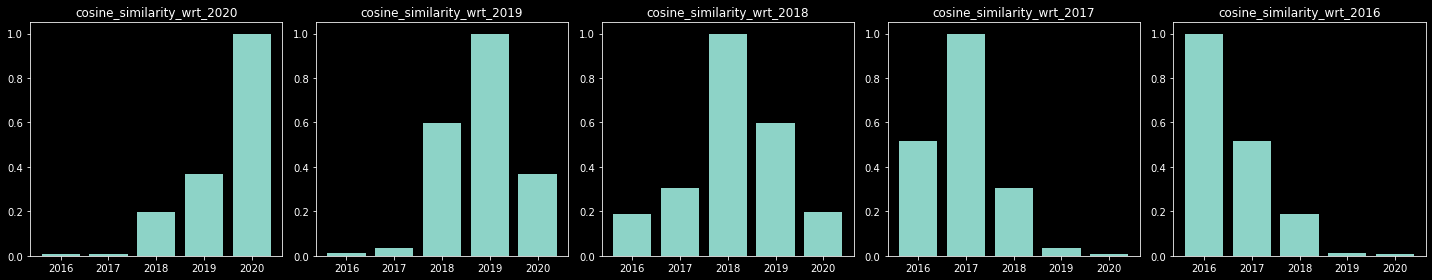

In [ ]:
i=1
plt.figure(figsize=(20,4))
for year in similarity.index:
  plt.subplot(1,5,i)
  i=i+1
  plt.bar(similarity.index,similarity.loc[year])
  plt.title('cosine_similarity_wrt_'+str(year))
  #plt.ylabel('cosine_similarity')
  plt.tight_layout()

similarity gets smaller and smaller as years are further apart

In [ ]:
year2year_sim=pd.Series([similarity.iloc[i+1,i] for i in range(4)])
year2year_sim.index=['{}-{}'.format(x,x-1) for x in [2020,2019,2018,2017]]
year2year_sim

2020-2019    0.369889
2019-2018    0.597477
2018-2017    0.302979
2017-2016    0.517903
dtype: float64

In [ ]:
#check impactfull words
print(tf_idf.diff(axis=1).dropna(axis=1).iloc[:,0].sort_values().head(10))

covid           -4.559881
pandemic        -4.247399
cybersecurity   -2.883726
modifications   -2.590290
coronavirus     -2.231155
outbreak        -2.231155
novel           -2.231155
duration        -2.231155
surveys         -1.768148
experienced     -1.768148
Name: 2019, dtype: float64


In [ ]:
print(tf_idf.diff(axis=1).dropna(axis=1).iloc[:,0].sort_values(ascending=False).head(10))

warehouse      1.474713
autonomous     1.270249
provisional    1.270249
occur          1.115577
56             1.115577
ended          1.006648
transfers      0.708155
recently       0.635124
offers         0.635124
guaranteed     0.635124
Name: 2019, dtype: float64


In [ ]:
#We see these words were specific only to one filing
print(counts.loc['covid'])
print()
print(counts.loc['autonomous'])

2020    16
2019     0
2018     0
2017     0
2016     0
Name: covid, dtype: int64

2020    0
2019    3
2018    3
2017    0
2016    0
Name: autonomous, dtype: int64


In [ ]:
print(counts.loc['software'])
print()
print(tf_idf.loc['software'])

2020    14
2019    14
2018    17
2017    49
2016    50
Name: software, dtype: int64

2020    0.0
2019    0.0
2018    0.0
2017    0.0
2016    0.0
Name: software, dtype: float64


In [ ]:
print(tf_log.loc['software'])
print()
print(idf.loc['software'])

2020    2.708050
2019    2.708050
2018    2.890372
2017    3.912023
2016    3.931826
Name: software, dtype: float64

0.0


In [ ]:
print(counts.loc['table'])
print()
print(tf_idf.loc['table'])

2020    16
2019    16
2018    17
2017    15
2016    15
Name: table, dtype: int64

2020    0.0
2019    0.0
2018    0.0
2017    0.0
2016    0.0
Name: table, dtype: float64


# Risk Analysis

In [ ]:
#An application of looking at these things is to see if there are companies that are becoming competitors
#Only in the most recent filing amazon comes up, but Oracle constantly mentions cloud
print(counts.loc["amazon"])
print(counts.loc["cloud"])
print()
print()
#Because cloud is mentioned in every documents it has no importance in the tf_idf
print(tf_idf.loc["amazon"])
print(tf_idf.loc["cloud"])

2020    0
2019    1
2018    1
2017    0
2016    0
Name: amazon, dtype: int64
2020    59
2019    61
2018    65
2017    61
2016    52
Name: cloud, dtype: int64


2020    0.000000
2019    0.635124
2018    0.635124
2017    0.000000
2016    0.000000
Name: amazon, dtype: float64
2020    0.0
2019    0.0
2018    0.0
2017    0.0
2016    0.0
Name: cloud, dtype: float64


In [ ]:
#pull risk sections of amazon and oracle
documents_oracle=pull_10k("Oracle Corp","0001341439")
risk_sections_oracle=[]
for doc_oracle in documents_oracle:
  risk_sections_oracle.append(get_risk_factors_section(doc_oracle.text_content()))

In [ ]:
print(len(risk_sections_oracle))

5


In [ ]:
print(risk_sections_oracle[0])



Risk Factors
We operate in rapidly changing economic and technological environments that present numerous risks, many of which are driven by factors that we cannot control or predict. The following discussion, as well as our “Critical Accounting Policies and Estimates” discussion in Management’s Discussion and Analysis of Financial Condition and Results of Operations (Item 7), highlights some of these risks. The risks described below are not exhaustive and you should carefully consider these risks and uncertainties before investing in our securities.
The COVID-19 pandemic has affected how we and our customers are operating our respective businesses, and the duration and extent to which this will impact our future results of operations and our overall financial performance remains uncertain.  A novel strain of coronavirus (COVID-19) was first identified in late calendar year 2019 and subsequently declared a pandemic by the World Health Organization in March 2020. The long-term impacts

In [ ]:
company = Company("Amazon Com Inc", "0001018724")
tree = company.get_all_filings(filing_type = "10-K")
docs = Company.get_documents(tree, no_of_documents=5)

In [ ]:
docs

[<Element sec-document at 0x7f7fce46e598>,
 <Element sec-document at 0x7f7fce57c688>,
 <Element sec-document at 0x7f7fce464778>,
 <Element sec-document at 0x7f7fce464228>,
 <Element sec-document at 0x7f7fce46e6d8>]

In [ ]:
docs[0].text_content()[0:100]

'0001018724-20-000004.txt : 20200131\n0001018724-20-000004.hdr.sgml : 20200131\n20200130204613\nACCESSIO'

In [ ]:
amazon_text=docs[0].text_content().replace('\xa0', ' ')
print(re.findall(re.compile("Item 1A\."),amazon_text))
for match in re.finditer("Item 1A\.",amazon_text):
  print(match)
print(match.span())
#match for all sections
matches=list(re.finditer(re.compile('Item [0-9][A-Z]*\.'),amazon_text))
print(matches)
print(len(matches))
print(matches[0])
print(matches[0][0])
# find all matches for Item 1A. first match will be in  table of contents and second match is in main document
item_matches=[index for index in range(len(matches)) if matches[index][0]=="Item 1A."]
item_matches
#section start index
start=max(item_matches)
end=start+1
#use span to get section text
start=matches[start].span()[1]
end=matches[end].span()[0]
print(start,end)
print(amazon_text[start:end])

['Item 1A.', 'Item 1A.']
<_sre.SRE_Match object; span=(45646, 45654), match='Item 1A.'>
<_sre.SRE_Match object; span=(59358, 59366), match='Item 1A.'>
(59358, 59366)
[<_sre.SRE_Match object; span=(45630, 45637), match='Item 1.'>, <_sre.SRE_Match object; span=(45646, 45654), match='Item 1A.'>, <_sre.SRE_Match object; span=(45667, 45675), match='Item 1B.'>, <_sre.SRE_Match object; span=(45702, 45709), match='Item 2.'>, <_sre.SRE_Match object; span=(45721, 45728), match='Item 3.'>, <_sre.SRE_Match object; span=(45747, 45754), match='Item 4.'>, <_sre.SRE_Match object; span=(45790, 45797), match='Item 5.'>, <_sre.SRE_Match object; span=(45911, 45918), match='Item 6.'>, <_sre.SRE_Match object; span=(45956, 45963), match='Item 7.'>, <_sre.SRE_Match object; span=(46050, 46058), match='Item 7A.'>, <_sre.SRE_Match object; span=(46118, 46125), match='Item 8.'>, <_sre.SRE_Match object; span=(46170, 46177), match='Item 9.'>, <_sre.SRE_Match object; span=(46263, 46271), match='Item 9A.'>, <_sre.SRE_

In [ ]:
documents_amazon=pull_10k("Amazon Com Inc","0001018724")
risk_sections_amazon=[]
for doc_amazon in documents_amazon:
  risk_sections_amazon.append(get_risk_factors_section(doc_amazon.text_content()))

In [ ]:
print(len(risk_sections_amazon))
print(risk_sections_amazon[4])


5
Risk FactorsPlease carefully consider the following risk factors. If any of the following risks occur, our business, financial condition, operating results, and cash flows could be materially adversely affected. In addition, the current global economic climate amplifies many of these risks.We Face Intense CompetitionOur businesses are rapidly evolving and intensely competitive, and we have many competitors in different industries, including retail, e-commerce services, digital content and electronic devices, and web and infrastructure computing services. Some of our current and potential competitors have greater resources, longer histories, more customers, and/or greater brand recognition. They may secure better terms from vendors, adopt more aggressive pricing, and devote more resources to technology, infrastructure, fulfillment, and marketing.Competition may intensify as our competitors enter into business combinations or alliances and established companies in other market segments

In [ ]:
print(len(risk_sections_oracle))
print(risk_sections_oracle[0][0:100])

5


Risk Factors
We operate in rapidly changing economic and technological environments that present n


In [ ]:
print(risk_sections_amazon[0])

Risk FactorsPlease carefully consider the following discussion of significant factors, events, and uncertainties that make an investment in our securities risky. The events and consequences discussed in these risk factors could, in circumstances we may or may not be able to accurately predict, recognize, or control, have a material adverse effect on our business, growth, reputation, prospects, financial condition, operating results (including components of our financial results), cash flows, liquidity, and stock price. These risk factors do not identify all risks that we face; our operations could also be affected by factors, events, or uncertainties that are not presently known to us or that we currently do not consider to present significant risks to our operations. In addition, the global economic climate amplifies many of these risks.We Face Intense CompetitionOur businesses are rapidly evolving and intensely competitive, and we have many competitors across geographies, including c

In [ ]:
stemmer=nltk.stem.SnowballStemmer('english')
vectorizer=CountVectorizer(stop_words='english')


In [ ]:
counts_oracle=vectorizer.fit_transform(risk_sections_oracle)
counts_oracle=pd.DataFrame(counts_oracle.toarray(),columns=vectorizer.get_feature_names()).transpose()
counts_oracle.columns=[2020,2019,2018,2017,2016]

In [ ]:
counts_amazon=vectorizer.fit_transform(risk_sections_amazon)
counts_amazon=pd.DataFrame(counts_amazon.toarray(),columns=vectorizer.get_feature_names()).transpose()
counts_amazon.columns=[2020,2019,2018,2017,2016]

In [ ]:
counts_amazon.head()

,2020,2019,2018,2017,2016
10table,1,1,1,1,1
11table,1,1,1,1,1
12table,1,1,1,1,1
13table,1,1,1,1,1
14table,1,0,1,0,0


In [ ]:
counts_amazon.tail()

,2020,2019,2018,2017,2016
year,2,2,2,2,2
years,0,0,2,1,1
yen,1,1,1,1,1
yuan,0,0,0,0,1
zone,2,2,2,2,2


In [ ]:
counts_amazon=counts_amazon.stack().reset_index()
counts_oracle=counts_oracle.stack().reset_index()


In [ ]:
counts_amazon.head()

,level_0,level_1,0
0,10table,2020,1
1,10table,2019,1
2,10table,2018,1
3,10table,2017,1
4,10table,2016,1


In [ ]:
counts_oracle.head()

,level_0,level_1,0
0,12,2020,0
1,12,2019,0
2,12,2018,0
3,12,2017,1
4,12,2016,0


In [ ]:
counts_amazon.columns = ["Word", "Time Period", "Count"]
counts_amazon["Company"] = "Amazon"
counts_oracle.columns = ["Word", "Time Period", "Count"]
counts_oracle["Company"] = "Oracle"
counts = pd.concat([counts_amazon, counts_oracle])
print(counts)

         Word  Time Period  Count Company
0     10table         2020      1  Amazon
1     10table         2019      1  Amazon
2     10table         2018      1  Amazon
3     10table         2017      1  Amazon
4     10table         2016      1  Amazon
...       ...          ...    ...     ...
9700      yen         2020      1  Oracle
9701      yen         2019      1  Oracle
9702      yen         2018      1  Oracle
9703      yen         2017      1  Oracle
9704      yen         2016      1  Oracle

[16950 rows x 4 columns]


In [ ]:
print(counts[counts["Word"] == "amazon"])

print(counts[counts["Word"] == "oracle"])

       Word  Time Period  Count Company
440  amazon         2020      4  Amazon
441  amazon         2019      5  Amazon
442  amazon         2018      5  Amazon
443  amazon         2017      5  Amazon
444  amazon         2016      5  Amazon
620  amazon         2020      0  Oracle
621  amazon         2019      1  Oracle
622  amazon         2018      1  Oracle
623  amazon         2017      0  Oracle
624  amazon         2016      0  Oracle
        Word  Time Period  Count Company
6180  oracle         2020     26  Oracle
6181  oracle         2019     28  Oracle
6182  oracle         2018     28  Oracle
6183  oracle         2017     29  Oracle
6184  oracle         2016     29  Oracle


In [ ]:
# amazon has not mentioned oracle in any of sec docuement

In [ ]:
counts = counts.set_index(["Company", "Time Period", "Word"])["Count"].unstack().transpose().fillna(0)
print(counts)

Company     Amazon                     Oracle                    
Time Period   2016 2017 2018 2019 2020   2016 2017 2018 2019 2020
Word                                                             
10table        1.0  1.0  1.0  1.0  1.0    0.0  0.0  0.0  0.0  0.0
11table        1.0  1.0  1.0  1.0  1.0    0.0  0.0  0.0  0.0  0.0
12             0.0  0.0  0.0  0.0  0.0    0.0  1.0  0.0  0.0  0.0
12table        1.0  1.0  1.0  1.0  1.0    0.0  0.0  0.0  0.0  0.0
13table        1.0  1.0  1.0  1.0  1.0    0.0  0.0  0.0  0.0  0.0
...            ...  ...  ...  ...  ...    ...  ...  ...  ...  ...
year           2.0  2.0  2.0  2.0  2.0    3.0  3.0  5.0  6.0  4.0
years          1.0  1.0  2.0  0.0  0.0    6.0  5.0  4.0  4.0  4.0
yen            1.0  1.0  1.0  1.0  1.0    1.0  1.0  1.0  1.0  1.0
yuan           1.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0
zone           2.0  2.0  2.0  2.0  2.0    0.0  0.0  0.0  0.0  0.0

[2481 rows x 10 columns]


In [ ]:
tf_log = np.log(counts + 1)

n = (counts > 0).sum(axis=1)

idf = np.log(len(counts.columns) / n)
tf_idf = tf_log.multiply(idf, axis=0)
print(tf_idf)

Company        Amazon                      ...    Oracle                    
Time Period      2016      2017      2018  ...      2018      2019      2020
Word                                       ...                              
10table      0.480453  0.480453  0.480453  ...  0.000000  0.000000  0.000000
11table      0.480453  0.480453  0.480453  ...  0.000000  0.000000  0.000000
12           0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
12table      0.480453  0.480453  0.480453  ...  0.000000  0.000000  0.000000
13table      0.480453  0.480453  0.480453  ...  0.000000  0.000000  0.000000
...               ...       ...       ...  ...       ...       ...       ...
year         0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
years        0.154671  0.154671  0.245148  ...  0.359136  0.359136  0.359136
yen          0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
yuan         1.596030  0.000000  0.000000  ...  0.000000  0.000000  0.000000

In [ ]:
# cosine similarity
similarity = cosine_similarity(tf_idf.transpose())
similarity = pd.DataFrame(similarity, index=tf_idf.columns,columns=tf_idf.columns)
print(similarity)

Company                Amazon                      ...    Oracle                    
Time Period              2016      2017      2018  ...      2018      2019      2020
Company Time Period                                ...                              
Amazon  2016         1.000000  0.915731  0.700170  ...  0.013907  0.012686  0.016344
        2017         0.915731  1.000000  0.738156  ...  0.009788  0.009630  0.014184
        2018         0.700170  0.738156  1.000000  ...  0.028550  0.029929  0.027938
        2019         0.725730  0.751471  0.659810  ...  0.018961  0.019986  0.022772
        2020         0.549129  0.569578  0.506296  ...  0.043929  0.040998  0.051559
Oracle  2016         0.014675  0.012107  0.021744  ...  0.714670  0.620014  0.477812
        2017         0.013255  0.010589  0.022823  ...  0.755140  0.631795  0.483179
        2018         0.013907  0.009788  0.028550  ...  1.000000  0.858839  0.617457
        2019         0.012686  0.009630  0.029929  ...  0.858839 

In [ ]:
#for each time period find the similarity between the two
yearly_sim = pd.Series([similarity.loc[("Amazon",x),("Oracle", x)] for x in [2020,2019,2018,2017,2016]], index=[2020,2019,2018,2017,2016])
print(yearly_sim)

2020    0.051559
2019    0.019986
2018    0.028550
2017    0.010589
2016    0.014675
dtype: float64


In [ ]:
#We can see that amazon talks a lot more about the supply chain buzzwords
diff = tf_idf[("Amazon", 2020)] - tf_idf[("Oracle", 2020)]
print(diff.sort_values(ascending=False).head(10))
print()
print()
print(diff.sort_values().head(10))

Word
stores         3.705868
extreme        3.192061
man            3.192061
omnichannel    2.590290
threatened     2.529648
written        2.529648
reviews        2.529648
advertising    2.231155
fulfillment    2.076483
content        2.040930
dtype: float64


Word
covid           -6.523715
pandemic        -6.076654
modifications   -3.705868
19              -3.479929
index           -3.411112
2020            -3.346732
coronavirus     -3.192061
outbreak        -3.192061
duration        -3.192061
cloud           -2.837983
dtype: float64


In [ ]:
i = diff.sort_values(ascending=False).head(5).index
print(counts.loc[i])

Company     Amazon                     Oracle                    
Time Period   2016 2017 2018 2019 2020   2016 2017 2018 2019 2020
Word                                                             
stores         0.0  0.0  0.0  9.0  9.0    0.0  0.0  0.0  0.0  0.0
extreme        0.0  0.0  0.0  0.0  3.0    0.0  0.0  0.0  0.0  0.0
man            0.0  0.0  0.0  0.0  3.0    0.0  0.0  0.0  0.0  0.0
omnichannel    0.0  0.0  0.0  4.0  4.0    0.0  0.0  0.0  0.0  0.0
threatened     0.0  0.0  0.0  0.0  2.0    0.0  0.0  0.0  0.0  0.0


In [ ]:
#This analysis can be useful to assess country level threats
#And correlations in the currency markets
print(counts.loc[['yen','yuan','china',]])

Company     Amazon                     Oracle                    
Time Period   2016 2017 2018 2019 2020   2016 2017 2018 2019 2020
Word                                                             
yen            1.0  1.0  1.0  1.0  1.0    1.0  1.0  1.0  1.0  1.0
yuan           1.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0
china          3.0  3.0  3.0  3.0  3.0    2.0  2.0  2.0  2.0  2.0


In [ ]:
counts.loc['india']

Company  Time Period
Amazon   2016           2.0
         2017           2.0
         2018           2.0
         2019           3.0
         2020           3.0
Oracle   2016           1.0
         2017           1.0
         2018           1.0
         2019           1.0
         2020           1.0
Name: india, dtype: float64